# Classification Analysis of Income Levels Based on the 1994 United States Census Data

# 1. Introduction/Abstract

This report looks at some past census data in order to develop a predictive model for income level of adults in United States. The outcome of the report could be significant for audiences such as real estate agencies or marketing firms as it enables them to target their advertisement more efficiently. The methodology utilised is a combination of data pre-processing, data exploration, and data modelling. The comparison between results of different modelling methods reveal that both utilised methods – K Nearest Neighbours and Decision Tree Classifier – can deliver reasonably accurate prediction. An important point was that optimisation of models can significantly improve the outcome of the prediction. 

In [1]:
# load all packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Preprocessing

The data is “Census Income Data Set” which has been extracted from the 1994 United States Census Database and donated to UCI Machine Learning Repository. The dataset includes six numeric variables and nine categorical variables. In total, it contains 48842 rows of data which is inclusive of over 3000 instances of missing values.

## 2.1 Data Retrieving

In [2]:
# Load the data
income_df = pd.read_csv('adult.csv', sep=',', 
                        decimal='.', header=None,
                        names=['age', 'workclass', 'final-weight', 'education', 'education-num',
                              'marital-status', 'occupation', 'relationship', 'race', 'sex',
                              'capital-gain', 'capital-loss', 'hours-per-week',
                              'native-country', 'class'])
# Create a copy of data
income_df2 = income_df

In [3]:
# Inspect the top rows of the data
income_df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Inspect the bottom rows of the data
income_df.tail()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [5]:
# Obtain general information on the data
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   final-weight    48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


The data types shown above match up with nature of each variable.

## 2.2 Data Cleaning

The contents of the dataset are investigated for typos, anamolies, incorrcet values and missing values.

In [6]:
# Check summary statistics of numeric variables
income_df.describe()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In the summary table above which is basically a compact-version sanity check, the dataset is investigated for impossible values. As can be seen, for all of the features, there are no negative values, impossibly small or impossibly large values. 

In [7]:
# Check summary statistics of non-numeric (object) variables
income_df.describe(include="O")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


The summary indicates that 'class' feature has values that do not match the data source. However, to be absolutely certain, all qualitative features are checked thoroughly.

### 2.2.1 Typos and Anamolies

The dataset, and specifically 'object' variables, are investigated for typos, anamolies and incorrect values.

In [8]:
# Substitute ' ?' with Null and then remove rows containing Null
income_df = income_df.replace(' ?', np.nan).dropna()

In [9]:
# Inspect contents of 'workclass' feature
income_df['workclass'].value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

All instances of this feature contain extra whitespace and require removal. This seems to be the case for all other categorical variables as well. 

In [10]:
# Remove extra whitespaces
income_df['workclass'] = income_df['workclass'].str.strip()

In [11]:
# Double-check
income_df['workclass'].value_counts(sort=False)

Self-emp-not-inc     3796
State-gov            1946
Local-gov            3100
Federal-gov          1406
Without-pay            21
Self-emp-inc         1646
Private             33307
Name: workclass, dtype: int64

In [12]:
# Inspect contents of 'education' feature
income_df['education'].value_counts()

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

In [13]:
# Remove extra whitespaces
income_df['education'] = income_df['education'].str.strip()

In [14]:
# Double-check
income_df['education'].value_counts(sort=False)

1st-4th           222
Prof-school       785
HS-grad         14783
Assoc-voc        1959
Some-college     9899
Preschool          72
11th             1619
9th               676
Doctorate         544
Assoc-acdm       1507
10th             1223
Masters          2514
5th-6th           449
Bachelors        7570
12th              577
7th-8th           823
Name: education, dtype: int64

In [15]:
# Inspect contents of 'marital-status' feature
income_df['marital-status'].value_counts()

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital-status, dtype: int64

In [16]:
# Remove extra whitespaces
income_df['marital-status'] = income_df['marital-status'].str.strip()

In [17]:
# Double-check
income_df['marital-status'].value_counts(sort=False)

Separated                 1411
Married-civ-spouse       21055
Married-AF-spouse           32
Divorced                  6297
Widowed                   1277
Never-married            14598
Married-spouse-absent      552
Name: marital-status, dtype: int64

In [18]:
# Inspect contents of 'occupation' feature
income_df['occupation'].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [19]:
# Remove extra whitespaces
income_df['occupation'] = income_df['occupation'].str.strip()

In [20]:
# Double-check
income_df['occupation'].value_counts(sort=False)

Other-service        4808
Priv-house-serv       232
Handlers-cleaners    2046
Prof-specialty       6008
Transport-moving     2316
Machine-op-inspct    2970
Craft-repair         6020
Sales                5408
Farming-fishing      1480
Tech-support         1420
Adm-clerical         5540
Protective-serv       976
Armed-Forces           14
Exec-managerial      5984
Name: occupation, dtype: int64

In [21]:
# Inspect contents of 'relationship' feature
income_df['relationship'].value_counts()

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1349
Name: relationship, dtype: int64

In [22]:
# Remove extra whitespaces
income_df['relationship'] = income_df['relationship'].str.strip()

In [23]:
# Double-check
income_df['relationship'].value_counts(sort=False)

Other-relative     1349
Unmarried          4788
Own-child          6626
Husband           18666
Wife               2091
Not-in-family     11702
Name: relationship, dtype: int64

In [24]:
# Inspect contents of 'race' feature
income_df['race'].value_counts()

 White                 38903
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

In [25]:
# Remove extra whitespaces
income_df['race'] = income_df['race'].str.strip()

In [26]:
# Double-check
income_df['race'].value_counts(sort=False)

Other                   353
White                 38903
Amer-Indian-Eskimo      435
Black                  4228
Asian-Pac-Islander     1303
Name: race, dtype: int64

In [27]:
# Inspect contents of 'sex' feature
income_df['sex'].value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

In [28]:
# Remove extra whitespaces
income_df['sex'] = income_df['sex'].str.strip()

In [29]:
# Double-check
income_df['sex'].value_counts(sort=False)

Male      30527
Female    14695
Name: sex, dtype: int64

In [30]:
# Inspect contents of 'native-country' feature
income_df['native-country'].value_counts()

 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 India                           147
 El-Salvador                     147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

In [31]:
# Remove extra whitespaces
income_df['native-country'] = income_df['native-country'].str.strip()

In [32]:
# Double-check
income_df['native-country'].value_counts(sort=False)

Guatemala                        86
South                           101
Vietnam                          83
El-Salvador                     147
Holand-Netherlands                1
Peru                             45
Nicaragua                        48
Hungary                          18
United-States                 41292
China                           113
Yugoslavia                       23
Columbia                         82
India                           147
Dominican-Republic               97
England                         119
Hong                             28
Cambodia                         26
Honduras                         19
Outlying-US(Guam-USVI-etc)       22
Greece                           49
Ecuador                          43
Italy                           100
Philippines                     283
Portugal                         62
Laos                             21
Puerto-Rico                     175
France                           36
Mexico                      

In [33]:
# Inspect contents of 'class' feature
income_df['class'].value_counts()

 <=50K     22654
 <=50K.    11360
 >50K       7508
 >50K.      3700
Name: class, dtype: int64

Apart from '<=50K' and '>50K', the 'class' feature also contains '<=50K.' and '>50K.' wchich need to be replaced by their correct corresponding values.

In [34]:
# Remove extra whitespaces
income_df['class'] = income_df['class'].str.strip()

In [35]:
# Replace typos with correct values
income_df['class'] = income_df['class'].replace({'<=50K.':'<=50K', '>50K.':'>50K'})

In [36]:
# Double-check
income_df['class'].value_counts(sort=False)

>50K     11208
<=50K    34014
Name: class, dtype: int64

### 2.2.2 Missing values

Previously, cells containing ' ?' were replaced by Null and then corresponding rows were removed from the dataset. Here, overall number of missing values is calculated for the whole dataset.

In [37]:
income_df.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

As shown above, the dataset does not include any missing values and it is ready for data exploration phase. 

# 3. Data Exploration

In this step, the data explored in three aspect of univariate, bivariate, and multivariate charts.

## 3.1 Univariate Graphs

### 3.1.1 Numeric Attributes

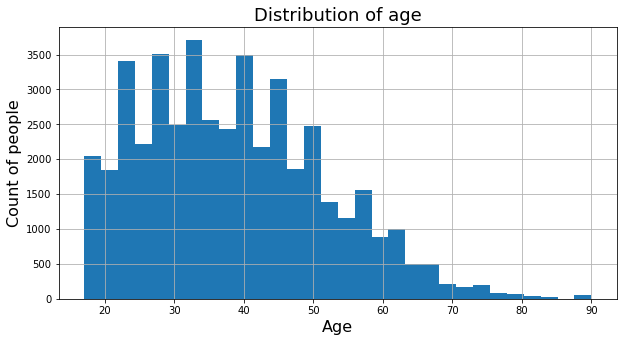

In [38]:
# Demonstrating distribution of 'age'
fig = plt.figure(figsize=(10,5))
income_df['age'].plot(kind='hist', bins=30)
plt.title('Distribution of age', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.grid()
plt.show()

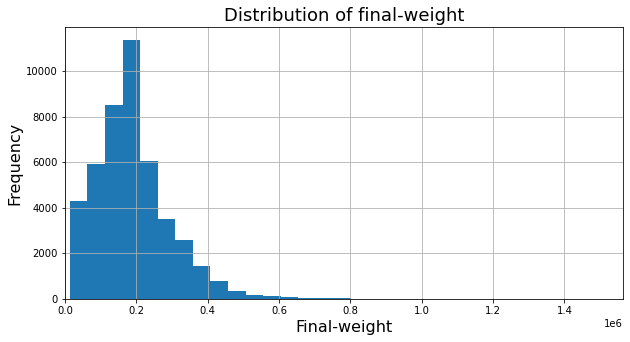

In [39]:
# Demonstrating distribution of 'final-weight'
fig = plt.figure(figsize=(10,5))
income_df['final-weight'].plot(kind='hist', bins=30)
plt.xlim(xmin=0)
plt.title('Distribution of final-weight', fontsize=18)
plt.xlabel('Final-weight', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid()
plt.show()


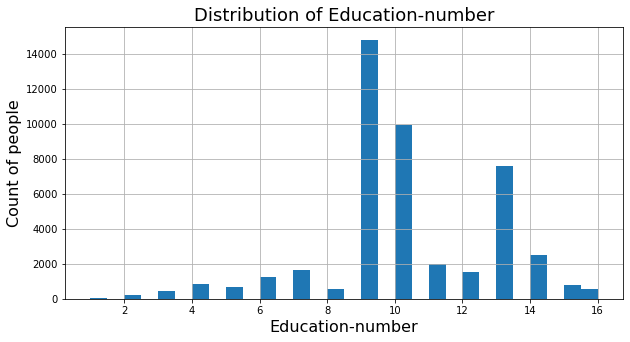

In [40]:
# Demonstrating distribution of education as 'education-num'
fig = plt.figure(figsize=(10,5))
income_df['education-num'].plot(kind='hist', bins=30)
plt.title('Distribution of Education-number', fontsize=18)
plt.xlabel('Education-number', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.grid()
plt.show()

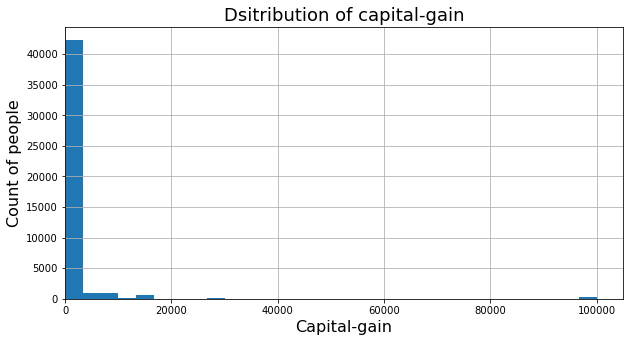

In [41]:
# Demonstrating distribution of 'capital-gain'
fig = plt.figure(figsize=(10,5))
income_df['capital-gain'].plot(kind='hist', bins=30)
plt.xlim(xmin=0)
plt.title('Dsitribution of capital-gain', fontsize=18)
plt.xlabel('Capital-gain', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.grid()
plt.show()

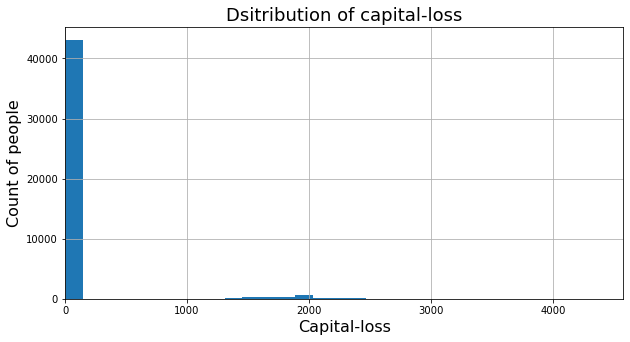

In [42]:
# Demonstrating distribution of 'capital-loss'
fig = plt.figure(figsize=(10,5))
income_df['capital-loss'].plot(kind='hist', bins=30)
plt.xlim(xmin=0)
plt.title('Dsitribution of capital-loss', fontsize=18)
plt.xlabel('Capital-loss', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.grid()
plt.show()

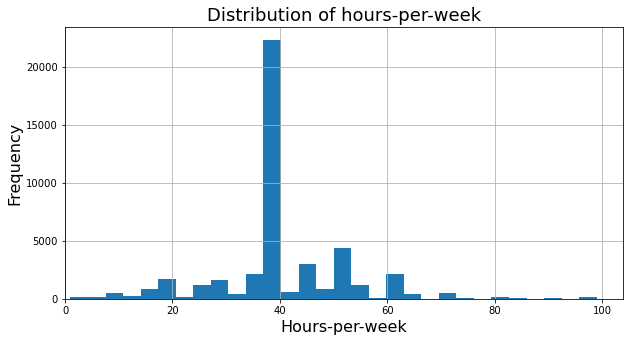

In [43]:
# Demonstrating distribution of 'hours-per-week'
fig = plt.figure(figsize=(10,5))
income_df['hours-per-week'].plot(kind='hist', bins=30)
plt.xlim(xmin=0)
plt.title('Distribution of hours-per-week', fontsize=18)
plt.xlabel('Hours-per-week', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid()
plt.show()

### 3.1.1 Categorical Attributes

Text(0.5, 1.0, 'Distribution of workclass')

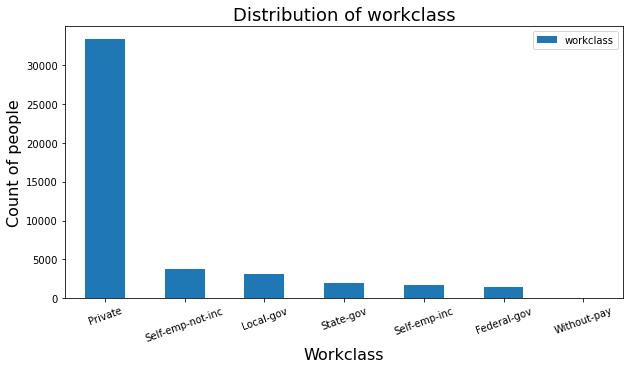

In [44]:
# Demonstrating distribution of 'workclass'
fig = plt.figure(figsize=(10,5))
income_df['workclass'].value_counts().plot(kind = 'bar', rot=20)
plt.xlabel('Workclass', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.legend(loc="upper right")
plt.title('Distribution of workclass', fontsize=18)

Text(0.5, 1.0, 'Distribution of education')

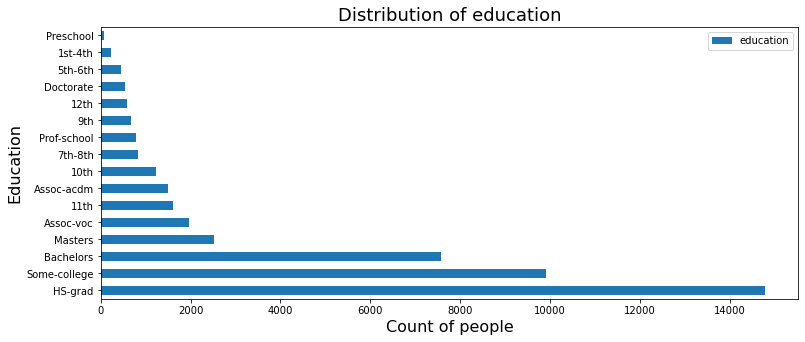

In [45]:
# Demonstrating distribution of 'education'
fig = plt.figure(figsize=(12.5,5))
income_df['education'].value_counts().plot(kind = 'barh')
plt.xlabel('Count of people', fontsize=16)
plt.ylabel('Education', fontsize=16)
plt.legend(loc="upper right")
plt.title('Distribution of education', fontsize=18)

Text(0.5, 1.0, 'Distribution of marital-status')

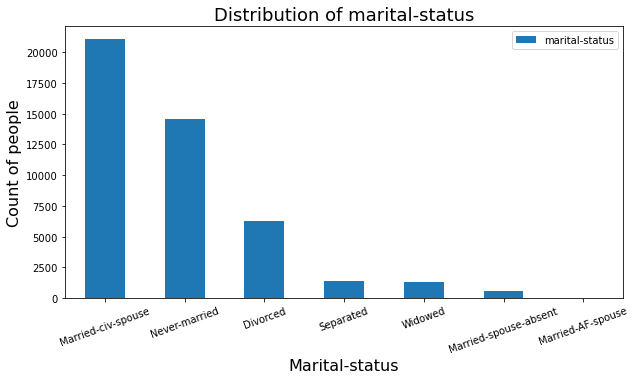

In [46]:
# Demonstrating distribution of 'marital-status'
fig = plt.figure(figsize=(10,5))
income_df['marital-status'].value_counts().plot(kind = 'bar', rot=20)
plt.xlabel('Marital-status', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.legend(loc="upper right")
plt.title('Distribution of marital-status', fontsize=18)

Text(0.5, 1.0, 'Distribution of occupation')

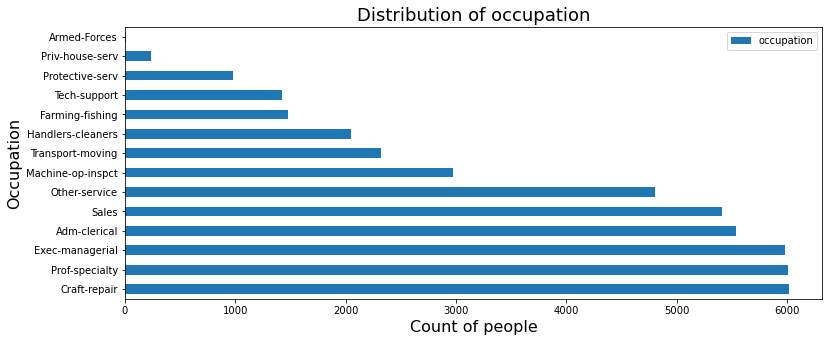

In [47]:
# Demonstrating distribution of 'occupation'
fig = plt.figure(figsize=(12.5,5))
income_df['occupation'].value_counts().plot(kind = 'barh')
plt.xlabel('Count of people', fontsize=16)
plt.ylabel('Occupation', fontsize=16)
plt.legend(loc="upper right")
plt.title('Distribution of occupation', fontsize=18)

Text(0.5, 1.0, 'Distribution of relationship')

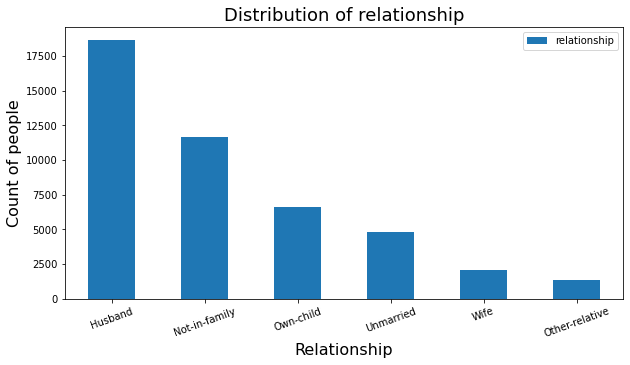

In [48]:
# Demonstrating distribution of 'relationship'
fig = plt.figure(figsize=(10,5))
income_df['relationship'].value_counts().plot(kind = 'bar', rot=20)
plt.xlabel('Relationship', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.legend(loc="upper right")
plt.title('Distribution of relationship', fontsize=18)

Text(0.5, 1.0, 'Distribution of ethnicity')

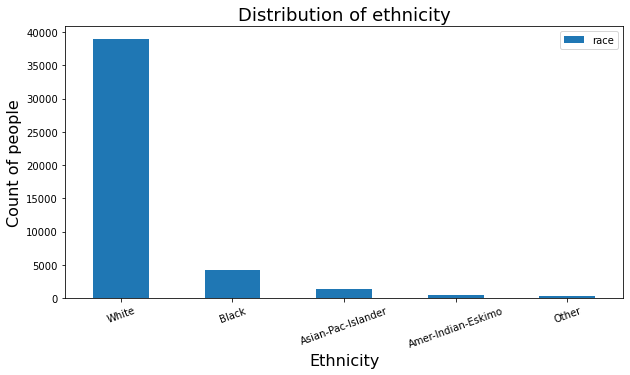

In [49]:
# Demonstrating distribution of 'race'
fig = plt.figure(figsize=(10,5))
income_df['race'].value_counts().plot(kind = 'bar', rot=20)
plt.xlabel('Ethnicity', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.legend(loc="upper right")
plt.title('Distribution of ethnicity', fontsize=18)

Text(0.5, 1.0, 'Distribution of gender')

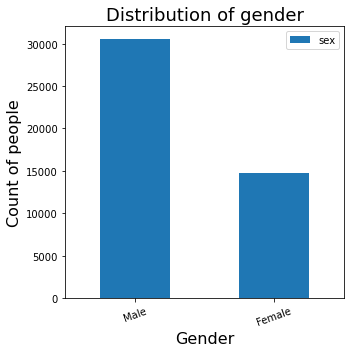

In [50]:
# Demonstrating distribution of 'sex'
fig = plt.figure(figsize=(5,5))
income_df['sex'].value_counts().plot(kind = 'bar', rot=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.legend(loc="upper right")
plt.title('Distribution of gender', fontsize=18)

Text(0.5, 1.0, 'Distribution of native-country')

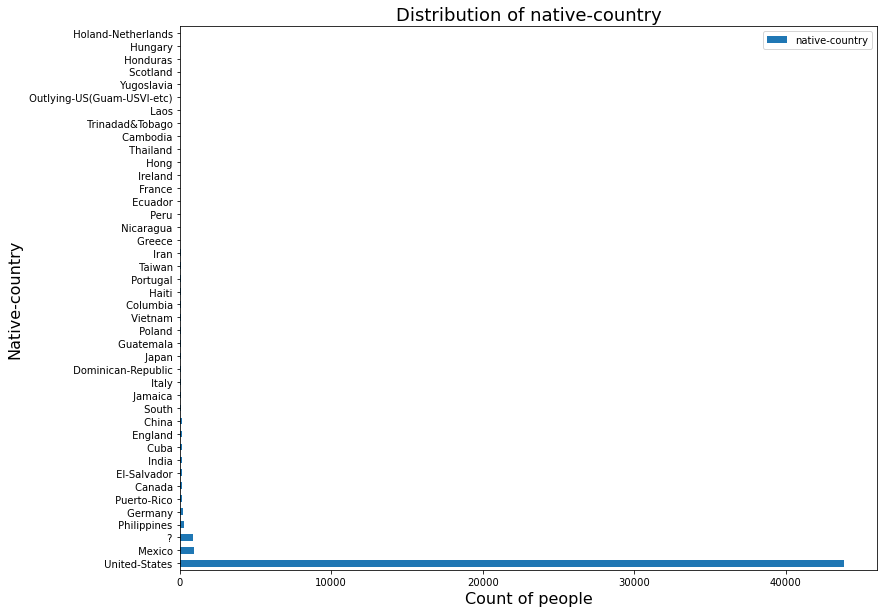

In [51]:
# Demonstrating distribution of 'native-country'
fig = plt.figure(figsize=(12.5,10))
income_df2['native-country'].value_counts().plot(kind = 'barh')
plt.xlabel('Count of people', fontsize=16)
plt.ylabel('Native-country', fontsize=16)
plt.legend(loc="upper right")
plt.title('Distribution of native-country', fontsize=18)

## 3.2 Bivariate Graphs

Text(0.5, 1.0, 'Distribution of income level per education')

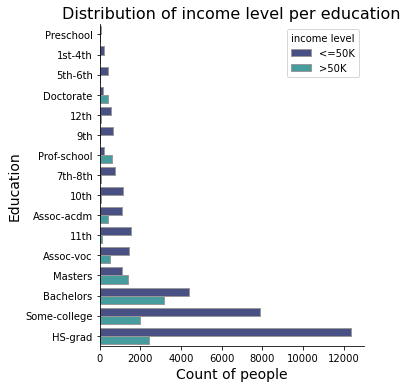

In [52]:
# Demonstrating 'education' and income level information 
sns.catplot(y="education", hue="class",order=('Preschool','1st-4th','5th-6th','Doctorate','12th',
                                                  '9th','Prof-school','7th-8th','10th','Assoc-acdm',
                                                  '11th','Assoc-voc','Masters','Bachelors','Some-college',
                                                  'HS-grad'),
            kind="count", palette="mako", edgecolor=".6",data=income_df, legend=False, height=5)
plt.legend(title = 'income level')
plt.xlabel('Count of people', fontsize=14)
plt.ylabel('Education', fontsize=14)
plt.title('Distribution of income level per education', fontsize=16)

Text(0.5, 1.0, 'Distribution of income level per workclass')

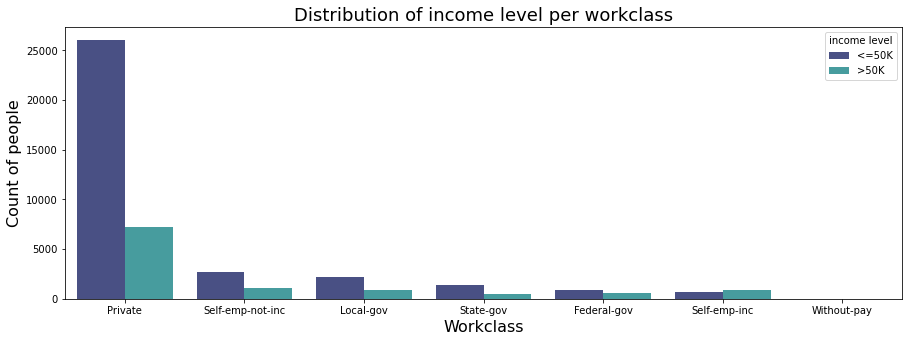

In [53]:
# Demonstrating 'worklcass' and income level information
fig = plt.figure(figsize=(15,5))
sns.countplot(x='workclass', hue ='class',data=income_df, palette='mako',
             order=('Private','Self-emp-not-inc','Local-gov','State-gov',
                    'Federal-gov','Self-emp-inc','Without-pay'))
plt.legend(title = 'income level', loc='upper right')
plt.xlabel('Workclass', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.title('Distribution of income level per workclass', fontsize=18)

Text(0.5, 1.0, 'Distribution of income level per native-country')

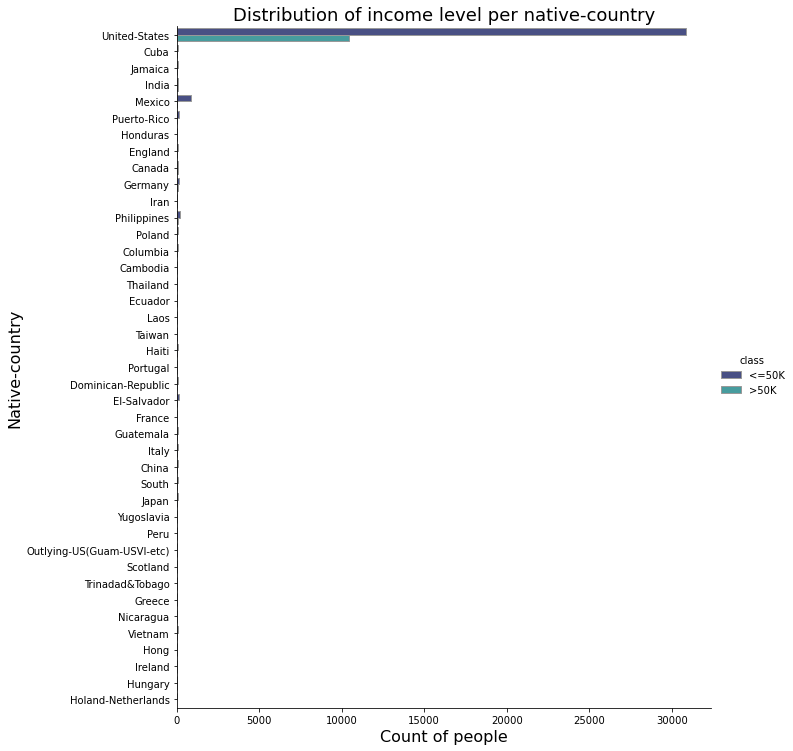

In [54]:
# Demonstrating 'native-country' and income level information
sns.catplot(y="native-country", hue="class", kind="count",
            palette="mako", edgecolor=".6",data=income_df, height=10)
plt.xlabel('Count of people', fontsize=16)
plt.ylabel('Native-country', fontsize=16)
plt.title('Distribution of income level per native-country', fontsize=18)

Text(0.5, 1.0, 'Distribution of income level per marital-status')

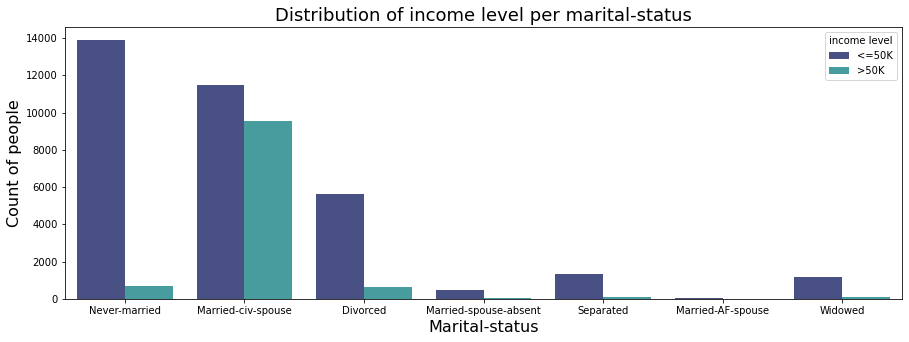

In [55]:
# Demonstrating 'marital-status' and income level information
fig = plt.figure(figsize=(15,5))
sns.countplot(x='marital-status', hue ='class',data=income_df, palette='mako')
plt.legend(title = 'income level')
plt.xlabel('Marital-status', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.title('Distribution of income level per marital-status', fontsize=18)

Text(0.5, 1.0, 'Distribution of income level per ethnicity')

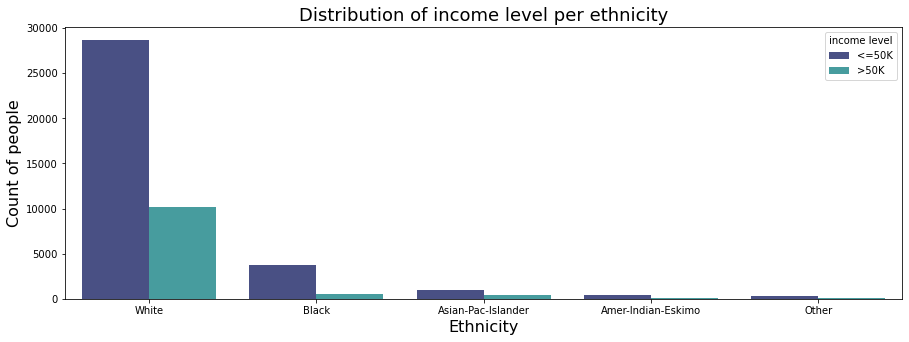

In [56]:
# Demonstrating 'race' and income level information
fig = plt.figure(figsize=(15,5))
sns.countplot(x='race', hue ='class',data=income_df, palette='mako')
plt.legend(title = 'income level')
plt.xlabel('Ethnicity', fontsize=16)
plt.ylabel('Count of people', fontsize=16)
plt.title('Distribution of income level per ethnicity', fontsize=18)

Text(0.5, 1.0, 'Distribution of income level per gender')

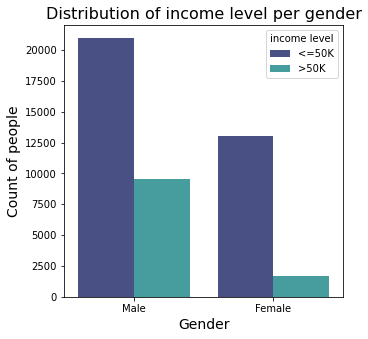

In [57]:
# Demonstrating 'sex' and income level information
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sex', hue ='class',data=income_df, palette='mako')
plt.legend(title = 'income level')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count of people', fontsize=14)
plt.title('Distribution of income level per gender', fontsize=16)

Text(0.5, 1.0, 'Distribution of capital-gain vs age by gender')

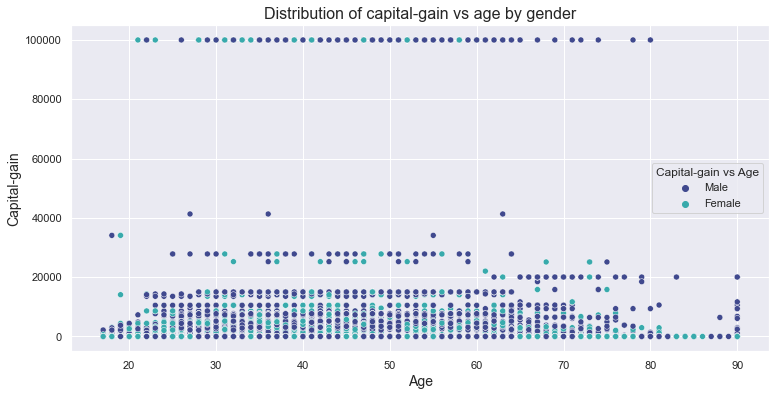

In [58]:
# Demonstrating scatter plot of 'capital-gain' vs 'age'
sns.set(rc={'figure.figsize':(12.5,6)})
sns.scatterplot(x='age', y='capital-gain',hue='sex', palette='mako', data =income_df)
plt.legend(title = 'Capital-gain vs Age', loc='right')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Capital-gain', fontsize=14)
plt.title('Distribution of capital-gain vs age by gender', fontsize=16)

Text(0.5, 1.0, 'Distribution of capital-loss vs age by gender')

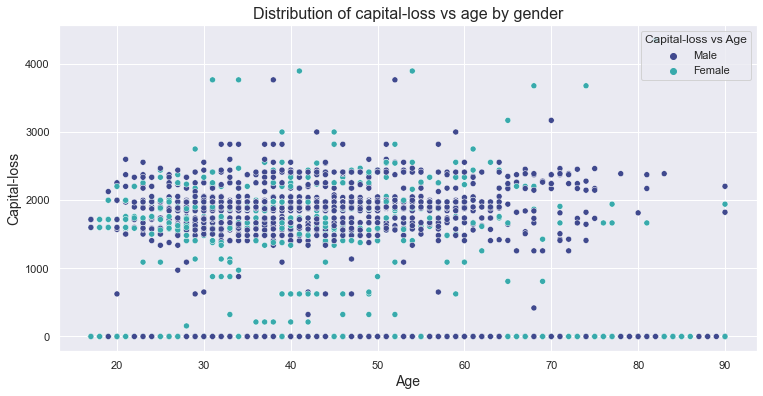

In [59]:
# Demonstrating scatter plot of 'capital-loss' vs 'age'
sns.set(rc={'figure.figsize':(12.5,6)})
sns.scatterplot(x='age', y='capital-loss', palette='mako',hue='sex', data =income_df)
plt.legend(title = 'Capital-loss vs Age', loc='upper right')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Capital-loss', fontsize=14)
plt.title('Distribution of capital-loss vs age by gender', fontsize=16)

Text(0.5, 1.0, 'Distribution of capital-gain vs weekly work hours by ethnicity')

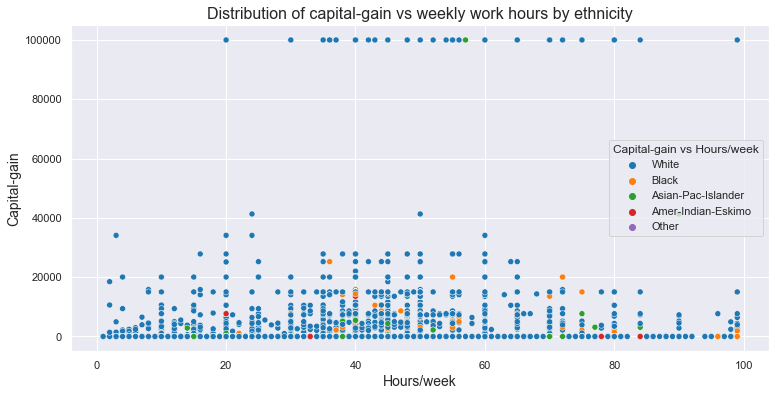

In [60]:
# Demonstrating scatter plot of 'capital-gain' vs 'hours-per-week'
sns.set(rc={'figure.figsize':(12.5,6)})
sns.scatterplot(x='hours-per-week', y='capital-gain', palette='tab10', hue='race', data =income_df)
plt.legend(title = 'Capital-gain vs Hours/week', loc='right')
plt.xlabel('Hours/week', fontsize=14)
plt.ylabel('Capital-gain', fontsize=14)
plt.title('Distribution of capital-gain vs weekly work hours by ethnicity', fontsize=16)

Text(0.5, 1.0, 'Distribution of capital-loss vs weekly work hours by ethnicity')

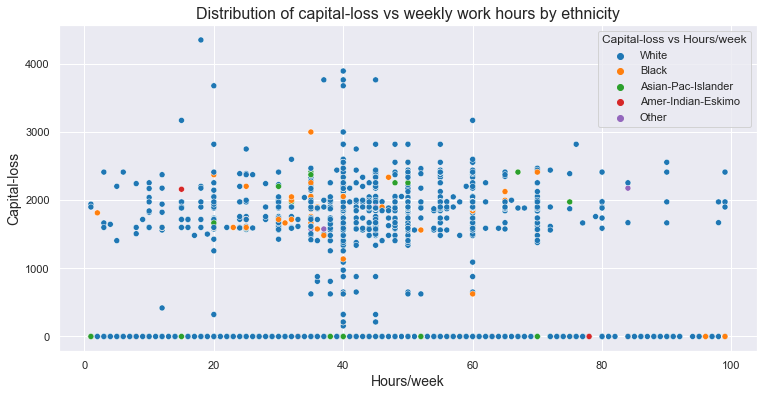

In [61]:
# Demonstrating scatter plot of 'capital-loss' vs 'hours-per-week'
sns.set(rc={'figure.figsize':(12.5,6)})
sns.scatterplot(x='hours-per-week', y='capital-loss', palette='tab10',hue='race', data =income_df)
plt.legend(title = 'Capital-loss vs Hours/week', loc='upper right')
plt.xlabel('Hours/week', fontsize=14)
plt.ylabel('Capital-loss', fontsize=14)
plt.title('Distribution of capital-loss vs weekly work hours by ethnicity', fontsize=16)

Text(0.5, 1.0, 'Boxplot of education and weekly work hours by gender')

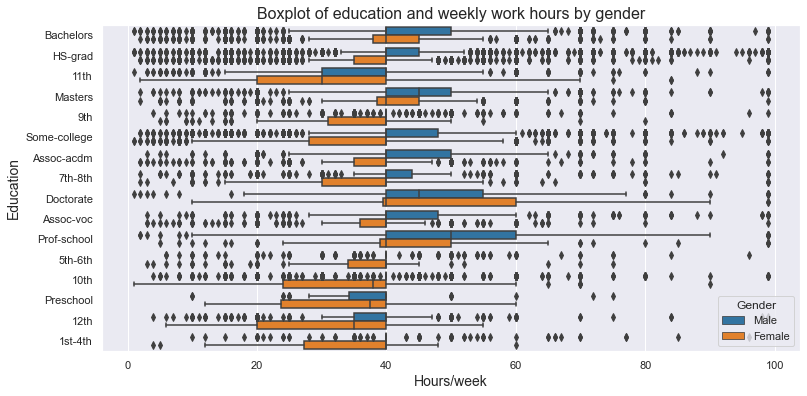

In [62]:
# Demonstrating Boxplot of 'education' and 'hours-per-week' by gender
sns.set(rc={'figure.figsize':(12.5,6)})
sns.boxplot(y="education", x="hours-per-week", data=income_df, hue='sex', palette="tab10", orient="h")
plt.legend(title = 'Gender')
plt.xlabel('Hours/week', fontsize=14)
plt.ylabel('Education', fontsize=14)
plt.title('Boxplot of education and weekly work hours by gender', fontsize=16)

Text(0.5, 1.0, 'Boxplot of age and income level by ethnicity')

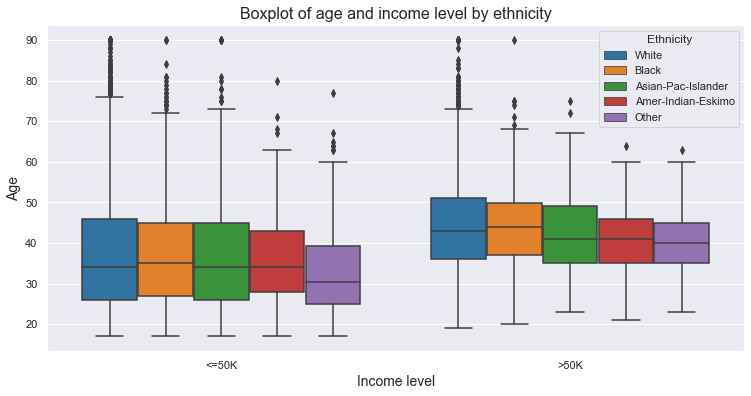

In [63]:
# Demonstrating boxplot of 'age' and income level by 'race'
sns.boxplot(x="class", y="age", data=income_df, hue='race', palette="tab10")
plt.legend(title = 'Ethnicity', loc='upper right')
plt.xlabel('Income level', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Boxplot of age and income level by ethnicity', fontsize=16)

## 3.2 Multivariate Graphs

In [64]:
# Find bi-column correlation of the dataset rounded to two digits
income_df.corr().round(2)

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.04,0.08,0.06,0.10
final-weight,-0.08,1.00,-0.04,-0.00,-0.00,-0.02
education-num,0.04,-0.04,1.00,0.13,0.08,0.15
capital-gain,0.08,-0.00,0.13,1.00,-0.03,0.08
capital-loss,0.06,-0.00,0.08,-0.03,1.00,0.05
hours-per-week,0.10,-0.02,0.15,0.08,0.05,1.00


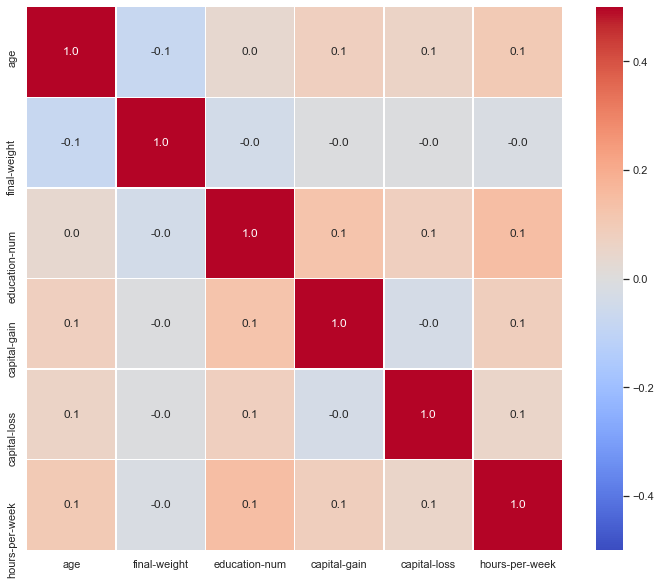

In [65]:
# Demonstrating heatmap of bi-column correlation
plt.figure(figsize=(12,10))
chart = sns.heatmap(income_df.corr(), vmin=-0.5, vmax=0.5,annot=True, fmt='.1f', linewidths=.5, cmap="coolwarm")

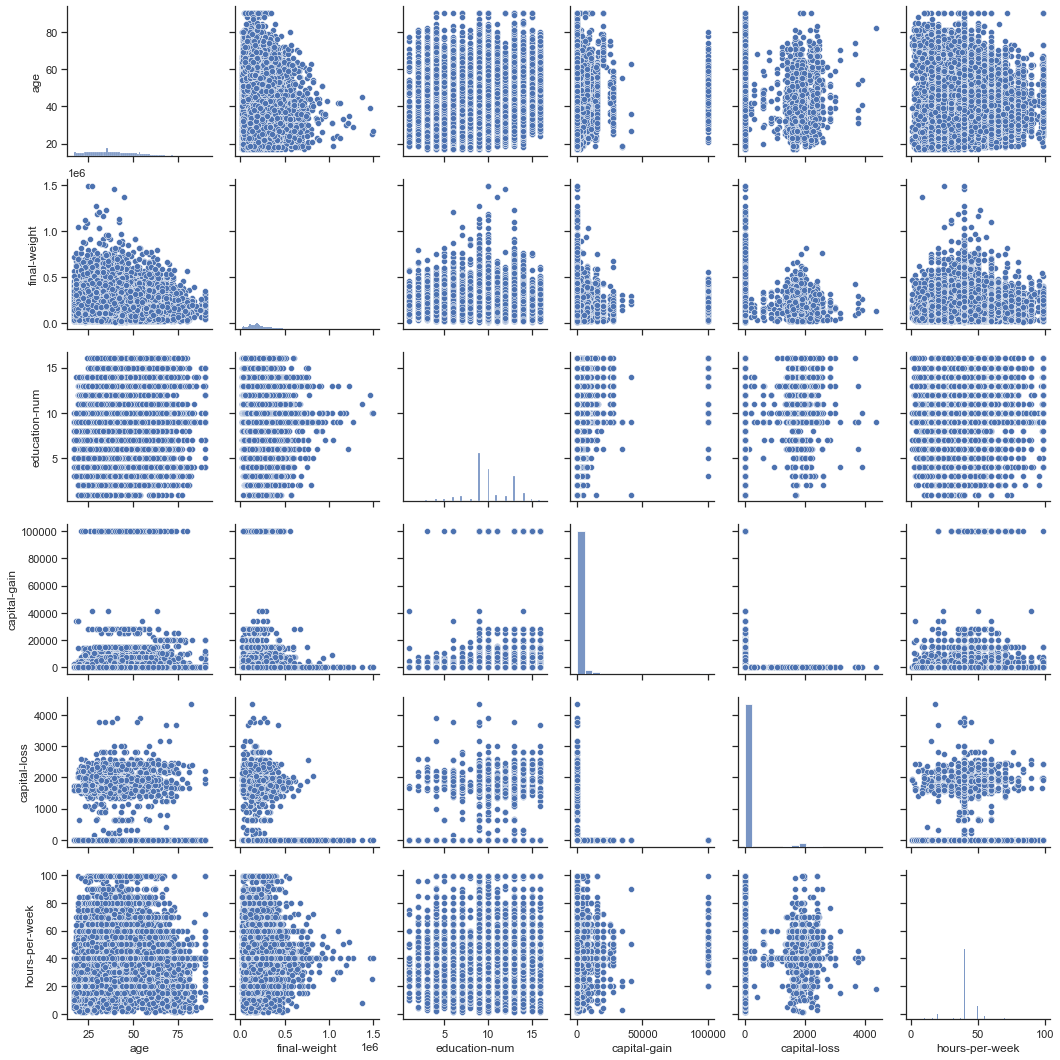

In [66]:
# Demonstrating scatter matrix of numeric features
sns.set_theme(style="ticks")
sns.pairplot(income_df)

### _Summary of data exploration_

By taking the entirity of data exploration into consideration, we can conclude that correlation among the variables is quite complex and may require advanced feature engineering for machine learning techniques. A clear lack of correlation can only be found betwen "native-country" and "class" (income level). This justifies the elimination of "native-country" prior to encoding the dataset. 

# 4. Data Modelling

In [67]:
# Remove 'native-country' from the dataset
income_df = income_df.drop('native-country', axis=1)

In [68]:
# Encoding categorical features and dropping the 1st columns
encoded_df = pd.get_dummies(income_df, drop_first='True')

In [69]:
# Inspect top rows of encoded data
encoded_df.head()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,class_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,50,83311,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,38,215646,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [70]:
# Check the shape of encoded data
encoded_df.shape

(45222, 57)

In [71]:
# Reset index of encoded data
encoded_df.reset_index(inplace=True)

## 4.1 Data Modelling with KNN

### 4.1.1 Select target and features

'class_>50K' is selected as target and all the remaining columns as features.

In [72]:
X_classification = encoded_df.loc[0:9999, 'age':'sex_Male']
y_classification = encoded_df.loc[0:9999, 'class_>50K']

In [73]:
# Inspect the features
X_classification.head()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,2174,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [74]:
# Inspect the target
y_classification.head()

0    0
1    0
2    0
3    0
4    0
Name: class_>50K, dtype: uint8

### 4.1.2 Train & Test Split - 50% for training and 50% for testing _(K = 3)_

In [75]:
# Set train and test split as 50-50
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_classification, 
                                                    y_classification, 
                                                    train_size = 0.5,
                                                    random_state=1)

In [76]:
# Inspect
X_train_50.head()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
4925,31,142470,13,0,0,40,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3341,23,189832,12,0,0,40,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2470,47,155489,9,7688,0,55,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
270,31,127595,9,0,0,40,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
8123,39,70995,13,15024,0,99,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [77]:
X_classification.shape

(10000, 56)

In [78]:
X_train_50.shape

(5000, 56)

In [79]:
y_train_50.shape

(5000,)

In [80]:
X_test_50.shape

(5000, 56)

In [81]:
y_test_50.shape

(5000,)

### 4.1.3 Build the knn model

In [82]:
clf_knn_50 = KNeighborsClassifier(3)

### 4.1.4 Fit the data

In [83]:
fit_knn_50 = clf_knn_50.fit(X_train_50, y_train_50)

### 4.1.5 Predict on unseen data

In [84]:
y_predicted_50 = fit_knn_50.predict(X_test_50)

### 4.1.6 Model Evaluation

In [85]:
# Calculate confusion matrix
cm_knn_50 = confusion_matrix(y_test_50, y_predicted_50)
cm_knn_50

array([[3376,  413],
       [ 860,  351]], dtype=int64)

In [86]:
# Create actual - predicted dataframe
df_50 = pd.DataFrame({
    "actual": y_test_50,
    "predicted": y_predicted_50
})
df_50.head()

,actual,predicted
9953,1,1
3850,0,0
4962,0,0
3886,0,0
5437,0,0


In [87]:
# Organise the dataframe
pd.crosstab(df_50['actual'], df_50['predicted'])

predicted,0,1
actual,,
0,3376,413
1,860,351


<AxesSubplot:xlabel='predicted', ylabel='actual'>

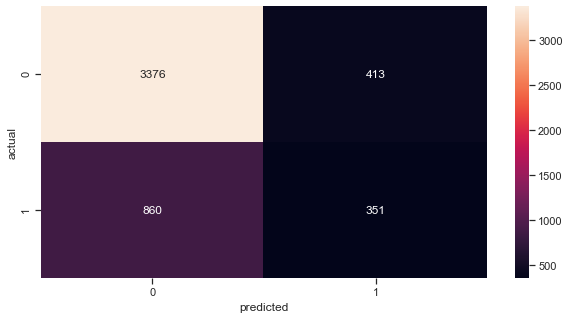

In [88]:
# Plot a heatmap of actual - predicted dataframe
fig = plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df_50['actual'], df_50['predicted']),annot=True, fmt='g')

In [89]:
# Calculate accuracy measures for the model
report_knn_50 = classification_report(y_test_50, y_predicted_50)
print(report_knn_50)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      3789
           1       0.46      0.29      0.36      1211

    accuracy                           0.75      5000
   macro avg       0.63      0.59      0.60      5000
weighted avg       0.72      0.75      0.72      5000



In [90]:
# Calculate f1-score for the model
f1_knn_50 = f1_score(y_test_50, y_predicted_50,average='weighted')
print(f1_knn_50)

0.723679032769431


In [91]:
# Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test_50, y_predicted_50)

0.7454

In [92]:
# Calculate classification error rate
cer_50 = 1 - accuracy_score(y_test_50, y_predicted_50)
cer_50

0.25460000000000005

### _Selecting the best K: K-fold Cross-validation_

In [93]:
# Load cross-validation package
from sklearn.model_selection import GridSearchCV

In [94]:
# Create an experimental model
knn = KNeighborsClassifier()

In [95]:
# Create a calibration parameter 
param_grid = {'n_neighbors': range(1,100, 3) }

# Find optimal value of calibration parameter
grid_knn = GridSearchCV(knn, param_grid, cv=5, verbose = 1, 
                      n_jobs = -1, scoring='f1_micro')

grid_knn.fit(X_train_50, y_train_50)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100, 3)}, scoring='f1_micro',
             verbose=1)

In [96]:
# Return the best value of K
print('best parameters',grid_knn.best_params_)

best parameters {'n_neighbors': 10}


Moving forward K=10 is selected as optimal value.

### 4.1.2 Train and Test split - 50% for training and 50% for testing _(K = 10)_

In [97]:
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_classification, 
                                                    y_classification, 
                                                    train_size = 0.5,
                                                    random_state=1)

In [98]:
X_train_50.head()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
4925,31,142470,13,0,0,40,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3341,23,189832,12,0,0,40,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2470,47,155489,9,7688,0,55,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
270,31,127595,9,0,0,40,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
8123,39,70995,13,15024,0,99,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [99]:
X_classification.shape

(10000, 56)

In [100]:
X_train_50.shape

(5000, 56)

In [101]:
y_train_50.shape

(5000,)

In [102]:
X_test_50.shape

(5000, 56)

In [103]:
y_test_50.shape

(5000,)

### 4.1.3 Build the knn model

In [104]:
clf_knn_50 = KNeighborsClassifier(10)

### 4.1.4 Fit the data

In [105]:
fit_knn_50 = clf_knn_50.fit(X_train_50, y_train_50)

### 4.1.5 Predict on unseen data

In [106]:
y_predicted_50 = fit_knn_50.predict(X_test_50)

### 4.1.6 Model Evaluation

In [107]:
cm_knn_50 = confusion_matrix(y_test_50, y_predicted_50)
cm_knn_50

array([[3739,   50],
       [1008,  203]], dtype=int64)

In [108]:
df_50 = pd.DataFrame({
    "actual": y_test_50,
    "predicted": y_predicted_50
})
df_50.head()

,actual,predicted
9953,1,1
3850,0,0
4962,0,0
3886,0,0
5437,0,0


In [109]:
pd.crosstab(df_50['actual'], df_50['predicted'])

predicted,0,1
actual,,
0,3739,50
1,1008,203


<AxesSubplot:xlabel='predicted', ylabel='actual'>

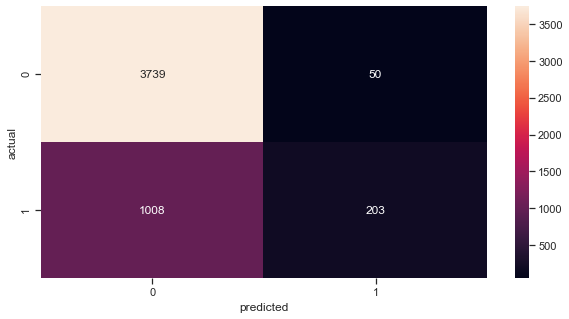

In [110]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df_50['actual'], df_50['predicted']),annot=True, fmt='g')

In [111]:
report_knn_50 = classification_report(y_test_50, y_predicted_50)
print(report_knn_50)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3789
           1       0.80      0.17      0.28      1211

    accuracy                           0.79      5000
   macro avg       0.80      0.58      0.58      5000
weighted avg       0.79      0.79      0.73      5000



In [112]:
f1_knn_50 = f1_score(y_test_50, y_predicted_50,average='weighted')
print(f1_knn_50)

0.7310414788411408


In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_50, y_predicted_50)

0.7884

In [114]:
cer_50 = 1 - accuracy_score(y_test_50, y_predicted_50)
cer_50

0.2116

### 4.1.2 Train and Test split - 60% for training and 40% for testing _(K = 10)_

In [115]:
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_classification, 
                                                    y_classification, 
                                                    train_size = 0.6,
                                                    random_state=1)

In [116]:
X_train_60.head()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
5834,31,269654,13,0,0,48,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2959,25,113436,10,0,0,35,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
2537,41,443508,13,0,0,48,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
166,33,37274,13,0,0,65,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
9083,64,216160,16,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [117]:
X_classification.shape

(10000, 56)

In [118]:
X_train_60.shape

(6000, 56)

In [119]:
y_train_60.shape

(6000,)

In [120]:
X_test_60.shape

(4000, 56)

In [121]:
y_test_60.shape

(4000,)

### 4.1.3 Build the knn model

In [122]:
clf_knn_60 = KNeighborsClassifier(10)

### 4.1.4 Fit the data

In [123]:
fit_knn_60 = clf_knn_60.fit(X_train_60, y_train_60)

### 4.1.5 Predict on unseen data

In [124]:
y_predicted_60 = fit_knn_60.predict(X_test_60)

### 4.1.6 Model Evaluation

In [125]:
cm_knn_60 = confusion_matrix(y_test_60, y_predicted_60)
cm_knn_60

array([[2989,   40],
       [ 792,  179]], dtype=int64)

In [126]:
df_60 = pd.DataFrame({
    "actual": y_test_60,
    "predicted": y_predicted_60
})
df_60.head()

,actual,predicted
9953,1,1
3850,0,0
4962,0,0
3886,0,0
5437,0,0


In [127]:
pd.crosstab(df_60['actual'], df_60['predicted'])

predicted,0,1
actual,,
0,2989,40
1,792,179


<AxesSubplot:xlabel='predicted', ylabel='actual'>

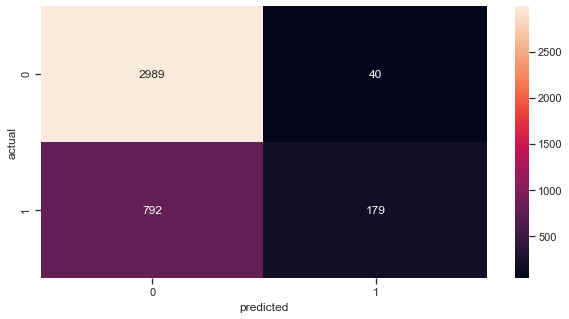

In [128]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df_60['actual'], df_60['predicted']),annot=True, fmt='g')

In [129]:
report_knn_60 = classification_report(y_test_60, y_predicted_60)
print(report_knn_60)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3029
           1       0.82      0.18      0.30       971

    accuracy                           0.79      4000
   macro avg       0.80      0.59      0.59      4000
weighted avg       0.80      0.79      0.74      4000



In [130]:
f1_knn_60 = f1_score(y_test_60, y_predicted_60,average='weighted')
print(f1_knn_60)

0.7377632794086797


In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_60, y_predicted_60)

0.792

In [132]:
cer_60 = 1 - accuracy_score(y_test_60, y_predicted_60)
cer_60

0.20799999999999996

### 4.1.2 Train and Test split - 80% for training and 20% for testing _(K = 10)_

In [133]:
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_classification, 
                                                    y_classification, 
                                                    train_size = 0.8,
                                                    random_state=1)

In [134]:
X_train_80.head()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
2694,50,177705,10,0,1740,48,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5140,55,123382,11,0,0,35,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2568,47,168283,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3671,28,157391,13,0,0,40,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7427,55,259532,4,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [135]:
X_classification.shape

(10000, 56)

In [136]:
X_train_80.shape

(8000, 56)

In [137]:
y_train_80.shape

(8000,)

In [138]:
X_test_80.shape

(2000, 56)

In [139]:
y_test_80.shape

(2000,)

### 4.1.3 Build the knn model

In [140]:
clf_knn_80 = KNeighborsClassifier(10)

### 4.1.4 Fit the data

In [141]:
fit_knn_80 = clf_knn_80.fit(X_train_80, y_train_80)

### 4.1.5 Predict on unseen data

In [142]:
y_predicted_80 = fit_knn_80.predict(X_test_80)

### 4.1.6 Model Evaluation

In [143]:
cm_knn_80 = confusion_matrix(y_test_80, y_predicted_80)
cm_knn_80

array([[1499,   19],
       [ 387,   95]], dtype=int64)

In [144]:
df_80 = pd.DataFrame({
    "actual": y_test_80,
    "predicted": y_predicted_80
})
df_80.head()

,actual,predicted
9953,1,1
3850,0,0
4962,0,0
3886,0,0
5437,0,0


In [145]:
pd.crosstab(df_80['actual'], df_80['predicted'])

predicted,0,1
actual,,
0,1499,19
1,387,95


<AxesSubplot:xlabel='predicted', ylabel='actual'>

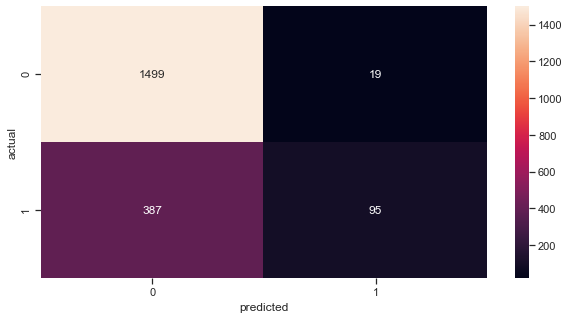

In [146]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df_80['actual'], df_80['predicted']),annot=True, fmt='g')

In [147]:
report_knn_80 = classification_report(y_test_80, y_predicted_80)
print(report_knn_80)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1518
           1       0.83      0.20      0.32       482

    accuracy                           0.80      2000
   macro avg       0.81      0.59      0.60      2000
weighted avg       0.80      0.80      0.75      2000



In [148]:
f1_knn_80 = f1_score(y_test_80, y_predicted_80,average='weighted')
print(f1_knn_80)

0.7453018320333757


In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_80, y_predicted_80)

0.797

In [150]:
cer_80 = 1 - accuracy_score(y_test_80, y_predicted_80)
cer_80

0.20299999999999996

## 4.2 Data Modelling with Decision Tree

### 4.2.1 Select target and features

In [151]:
X_classification = encoded_df.loc[0:9999, 'age':'sex_Male']
y_classification = encoded_df.loc[0:9999, 'class_>50K']

In [152]:
X_classification.head()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,2174,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [153]:
y_classification.head()

0    0
1    0
2    0
3    0
4    0
Name: class_>50K, dtype: uint8

### 4.2.2 Train, Test, and Split - 50% for training and 50% for testing

In [154]:
X_train_dtc_50, X_test_dtc_50, y_train_dtc_50, y_test_dtc_50 = train_test_split(X_classification, 
                                                    y_classification, 
                                                    train_size = 0.5,
                                                    random_state=1)

### 4.2.3 Build the decision tree model

In [155]:
from sklearn.tree import DecisionTreeClassifier
dtc_50 = DecisionTreeClassifier()

### 4.2.4 Fit the data

In [156]:
fit_dtc_50 = dtc_50.fit(X_train_dtc_50, y_train_dtc_50)

### 4.2.5 Predict on unseen data

In [157]:
y_predicted_dtc_50 = fit_dtc_50.predict(X_test_dtc_50)

### 4.2.6 Model Evaluation

In [158]:
cm_dtc_50 = confusion_matrix(y_test_dtc_50, y_predicted_dtc_50)
cm_dtc_50

array([[3253,  536],
       [ 487,  724]], dtype=int64)

In [159]:
df_dtc_50 = pd.DataFrame({
    "actual": y_test_dtc_50,
    "predicted_dtc": y_predicted_dtc_50
})
df_dtc_50.head()

,actual,predicted_dtc
9953,1,1
3850,0,0
4962,0,0
3886,0,0
5437,0,0


In [160]:
pd.crosstab(df_dtc_50['actual'], df_dtc_50['predicted_dtc'])

predicted_dtc,0,1
actual,,
0,3253,536
1,487,724


<AxesSubplot:xlabel='predicted_dtc', ylabel='actual'>

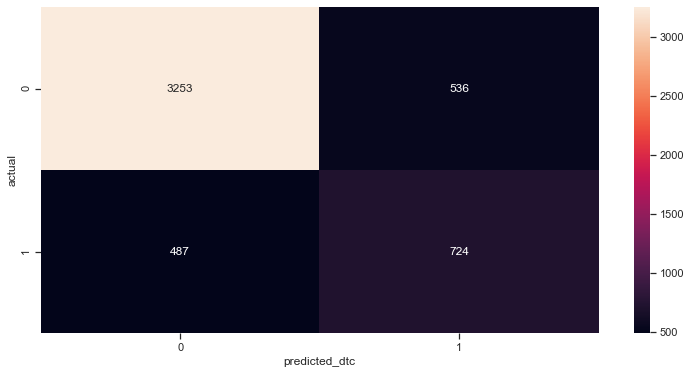

In [161]:
sns.heatmap(pd.crosstab(df_dtc_50['actual'], df_dtc_50['predicted_dtc']),annot=True, fmt='g')

In [162]:
report_dtc_50 = classification_report(y_test_dtc_50, y_predicted_dtc_50)
print(report_dtc_50)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      3789
           1       0.57      0.60      0.59      1211

    accuracy                           0.80      5000
   macro avg       0.72      0.73      0.73      5000
weighted avg       0.80      0.80      0.80      5000



In [163]:
f1_dtc_50 = f1_score(y_test_dtc_50, y_predicted_dtc_50,average='weighted')
print(f1_dtc_50)

0.7967628262691153


In [164]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_dtc_50, y_predicted_dtc_50)

0.7954

In [165]:
cer_dtc_50 = 1 - accuracy_score(y_test_dtc_50, y_predicted_dtc_50)
cer_dtc_50

0.2046

In [166]:
# Find optimal max depth for the DTC model
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

param_grid = {'max_depth': range(1,10)}

grid_dtc_50 = GridSearchCV(dtc, param_grid, cv=10, 
                      n_jobs = -1, scoring='f1_micro')
 
grid_dtc_50.fit(X_train_dtc_50, y_train_dtc_50)

print('best parameters',grid_dtc_50.best_params_)

best parameters {'max_depth': 4}


In [167]:
# Calculate accuracy score with tuned max depth
y_predicted_dtc_50_tuned = grid_dtc_50.predict(X_test_dtc_50)
accuracy_score(y_test_dtc_50, y_predicted_dtc_50_tuned)

0.843

In [168]:
# Calculate classification error rate
cer_dtc_50_tuned = 1 - accuracy_score(y_test_dtc_50, y_predicted_dtc_50_tuned)
cer_dtc_50_tuned

0.15700000000000003

In [169]:
# Calculate other accuracy measures
report_dtc_50 = classification_report(y_test_dtc_50, y_predicted_dtc_50_tuned)
print(report_dtc_50)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3789
           1       0.74      0.54      0.62      1211

    accuracy                           0.84      5000
   macro avg       0.80      0.74      0.76      5000
weighted avg       0.83      0.84      0.83      5000



### 4.2.2 Train and Test split - 60% for training and 40% for testing

In [170]:
X_train_dtc_60, X_test_dtc_60, y_train_dtc_60, y_test_dtc_60 = train_test_split(X_classification, 
                                                    y_classification, 
                                                    train_size = 0.6,
                                                    random_state=1)

### 4.2.3 Build the decision tree model

In [171]:
from sklearn.tree import DecisionTreeClassifier
dtc_60 = DecisionTreeClassifier()

### 4.2.4 Fit the data

In [172]:
fit_dtc_60 = dtc_60.fit(X_train_dtc_60, y_train_dtc_60)

### 4.2.5 Predict on unseen data

In [173]:
y_predicted_dtc_60 = fit_dtc_60.predict(X_test_dtc_60)

### 4.2.6 Model Evaluation

In [174]:
cm_dtc_60 = confusion_matrix(y_test_dtc_60, y_predicted_dtc_60)
cm_dtc_60

array([[2600,  429],
       [ 357,  614]], dtype=int64)

In [175]:
# how to give the label for the matrix?
df_dtc_60 = pd.DataFrame({
    "actual": y_test_dtc_60,
    "predicted_dtc": y_predicted_dtc_60
})
df_dtc_60.head()

,actual,predicted_dtc
9953,1,1
3850,0,0
4962,0,0
3886,0,0
5437,0,0


In [176]:
pd.crosstab(df_dtc_60['actual'], df_dtc_60['predicted_dtc'])

predicted_dtc,0,1
actual,,
0,2600,429
1,357,614


<AxesSubplot:xlabel='predicted_dtc', ylabel='actual'>

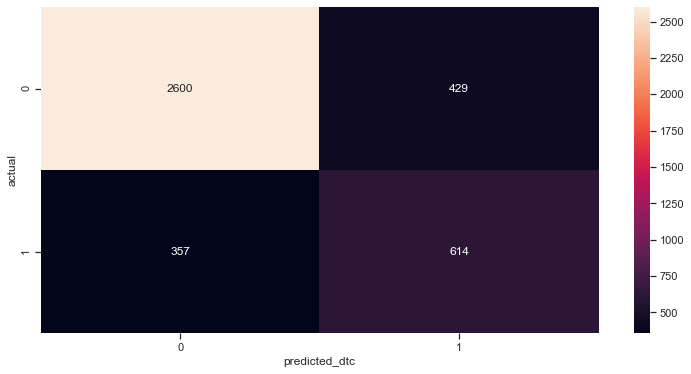

In [177]:
sns.heatmap(pd.crosstab(df_dtc_60['actual'], df_dtc_60['predicted_dtc']),annot=True, fmt='g')

In [178]:
report_dtc_60 = classification_report(y_test_dtc_60, y_predicted_dtc_60)
print(report_dtc_60)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3029
           1       0.59      0.63      0.61       971

    accuracy                           0.80      4000
   macro avg       0.73      0.75      0.74      4000
weighted avg       0.81      0.80      0.81      4000



In [179]:
f1_dtc_60 = f1_score(y_test_dtc_60, y_predicted_dtc_60,average='weighted')
print(f1_dtc_60)

0.8058306556742296


In [180]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_dtc_60, y_predicted_dtc_60)

0.8035

In [181]:
cer_dtc_60 = 1 - accuracy_score(y_test_dtc_60, y_predicted_dtc_60)
cer_dtc_60

0.1965

In [182]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

param_grid = {'max_depth': range(1,10)}

grid_dtc_60 = GridSearchCV(dtc, param_grid, cv=10, n_jobs = -1, scoring='f1_micro')

grid_dtc_60.fit(X_train_dtc_60, y_train_dtc_60)

print('best parameters',grid_dtc_60.best_params_)

best parameters {'max_depth': 3}


In [183]:
y_predicted_dtc_60_tuned = grid_dtc_60.predict(X_test_dtc_60)
accuracy_score(y_test_dtc_60, y_predicted_dtc_60_tuned)

0.84675

In [184]:
cer_dtc_60_tuned = 1 - accuracy_score(y_test_dtc_60, y_predicted_dtc_60_tuned)
cer_dtc_60_tuned

0.15325

In [185]:
report_dtc_60 = classification_report(y_test_dtc_60, y_predicted_dtc_60_tuned)
print(report_dtc_60)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3029
           1       0.75      0.55      0.64       971

    accuracy                           0.85      4000
   macro avg       0.81      0.75      0.77      4000
weighted avg       0.84      0.85      0.84      4000



### 4.2.2 Train and Test split - 80% for training and 20% for testing

In [186]:
X_train_dtc_80, X_test_dtc_80, y_train_dtc_80, y_test_dtc_80 = train_test_split(X_classification, 
                                                    y_classification, 
                                                    train_size = 0.8,
                                                    random_state=1)

### 4.2.3 Build the decision tree model

In [187]:
from sklearn.tree import DecisionTreeClassifier
dtc_80 = DecisionTreeClassifier()

### 4.2.4 Fit the data

In [188]:
fit_dtc_80 = dtc_80.fit(X_train_dtc_80, y_train_dtc_80)

### 4.2.5 Predict on unseen data

In [189]:
y_predicted_dtc_80 = fit_dtc_80.predict(X_test_dtc_80)

### 4.2.6 Model Evaluation

In [190]:
cm_dtc_80 = confusion_matrix(y_test_dtc_80, y_predicted_dtc_80)
cm_dtc_80

array([[1305,  213],
       [ 171,  311]], dtype=int64)

In [191]:
# how to give the label for the matrix?
df_dtc_80 = pd.DataFrame({
    "actual": y_test_dtc_80,
    "predicted_dtc": y_predicted_dtc_80
})
df_dtc_80.head()

,actual,predicted_dtc
9953,1,1
3850,0,0
4962,0,0
3886,0,0
5437,0,0


In [192]:
pd.crosstab(df_dtc_80['actual'], df_dtc_80['predicted_dtc'])

predicted_dtc,0,1
actual,,
0,1305,213
1,171,311


<AxesSubplot:xlabel='predicted_dtc', ylabel='actual'>

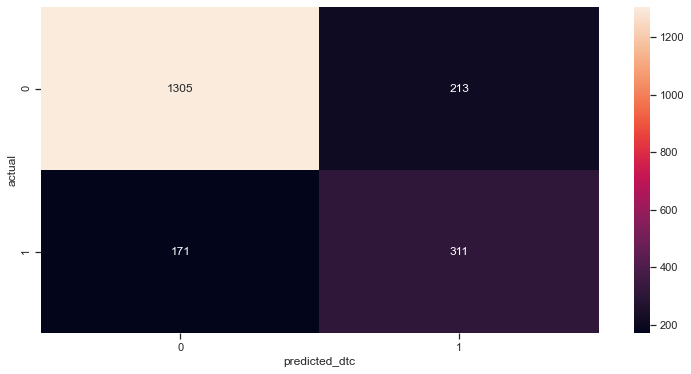

In [193]:
sns.heatmap(pd.crosstab(df_dtc_80['actual'], df_dtc_80['predicted_dtc']),annot=True, fmt='g')

In [194]:
report_dtc_80 = classification_report(y_test_dtc_80, y_predicted_dtc_80)
print(report_dtc_80)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1518
           1       0.59      0.65      0.62       482

    accuracy                           0.81      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.81      0.81      0.81      2000



In [195]:
f1_dtc_80 = f1_score(y_test_dtc_80, y_predicted_dtc_80,average='weighted')
print(f1_dtc_80)

0.8106612588995089


In [196]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_dtc_80, y_predicted_dtc_80)

0.808

In [197]:
cer_dtc_80 = 1 - accuracy_score(y_test_dtc_80, y_predicted_dtc_80)
cer_dtc_80

0.19199999999999995

In [198]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

param_grid = {'max_depth': range(1,10)}

grid_dtc_80 = GridSearchCV(dtc, param_grid, cv=10, n_jobs = -1, scoring='f1_micro')

grid_dtc_80.fit(X_train_dtc_80, y_train_dtc_80)

print('best parameters',grid_dtc_80.best_params_)

best parameters {'max_depth': 8}


In [199]:
y_predicted_dtc_80_tuned = grid_dtc_80.predict(X_test_dtc_80)
accuracy_score(y_test_dtc_80, y_predicted_dtc_80_tuned)

0.8495

In [200]:
cer_dtc_80_tuned = 1 - accuracy_score(y_test_dtc_80, y_predicted_dtc_80_tuned)
cer_dtc_80_tuned

0.15049999999999997

In [201]:
report_dtc_80 = classification_report(y_test_dtc_80, y_predicted_dtc_80_tuned)
print(report_dtc_80)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1518
           1       0.77      0.54      0.63       482

    accuracy                           0.85      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.84      0.85      0.84      2000



# 5. Result & Discussion

In [202]:
# Load the results dataset (I created this simple dataset to visualise and commmuicate the results)
results_df = pd.read_csv('KNNvsDTC.csv', sep=',', 
                        decimal='.', header=None,
                        names=['Method', 'Split', 'Classification_Error_Rate',
                              'Precision', 'Recall', 'F1_Score'])
results_df.head(10)

,Method,Split,Classification_Error_Rate,Precision,Recall,F1_Score
0,KNN,50 - 50,0.212,0.79,0.79,0.73
1,KNN,60 - 40,0.208,0.80,0.79,0.74
2,KNN,80 - 20,0.203,0.80,0.80,0.75
3,DTC,50 - 50,0.156,0.84,0.84,0.83
4,DTC,60 - 40,0.153,0.84,0.85,0.84
5,DTC,80 - 20,0.152,0.84,0.85,0.84


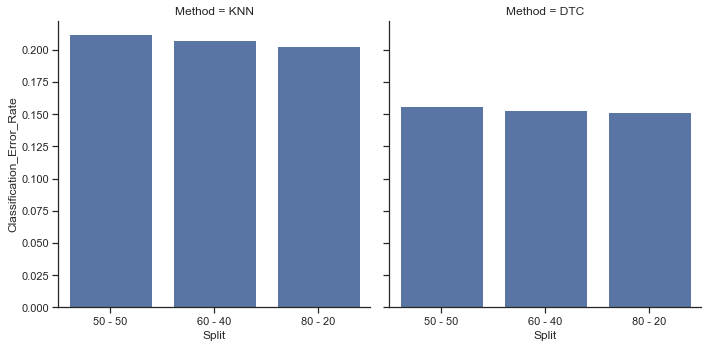

In [203]:
# Create visualisation for CER
g = sns.FacetGrid(results_df, col='Method', height=5)
g.map(sns.barplot, 'Split', 'Classification_Error_Rate', order=['50 - 50', '60 - 40', '80 - 20'])

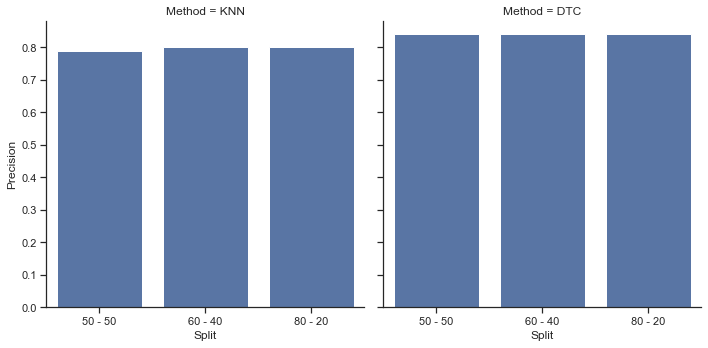

In [204]:
# Create visualisation for Precision
g = sns.FacetGrid(results_df, col='Method', height=5)
g.map(sns.barplot, 'Split', 'Precision', order=['50 - 50', '60 - 40', '80 - 20'])

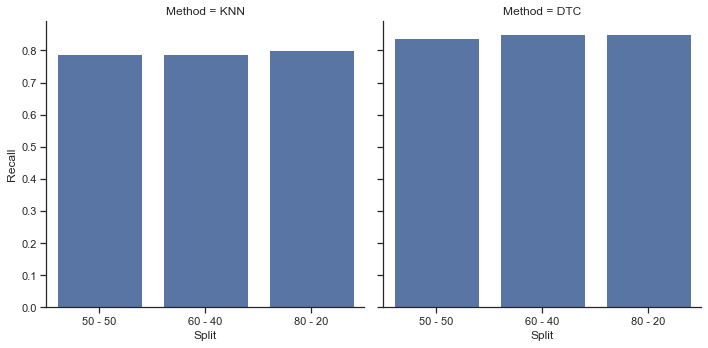

In [205]:
# Create visualisation for Recall
g = sns.FacetGrid(results_df, col='Method', height=5)
g.map(sns.barplot, 'Split', 'Recall', order=['50 - 50', '60 - 40', '80 - 20'])

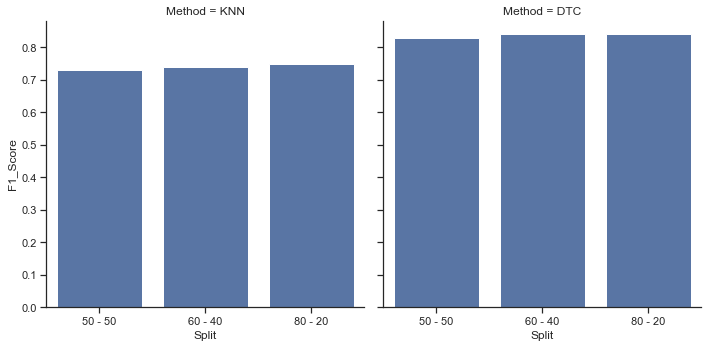

In [206]:
# Create visualisation for F1_Score
g = sns.FacetGrid(results_df, col='Method', height=5)
g.map(sns.barplot, 'Split', 'F1_Score', order=['50 - 50', '60 - 40', '80 - 20'])

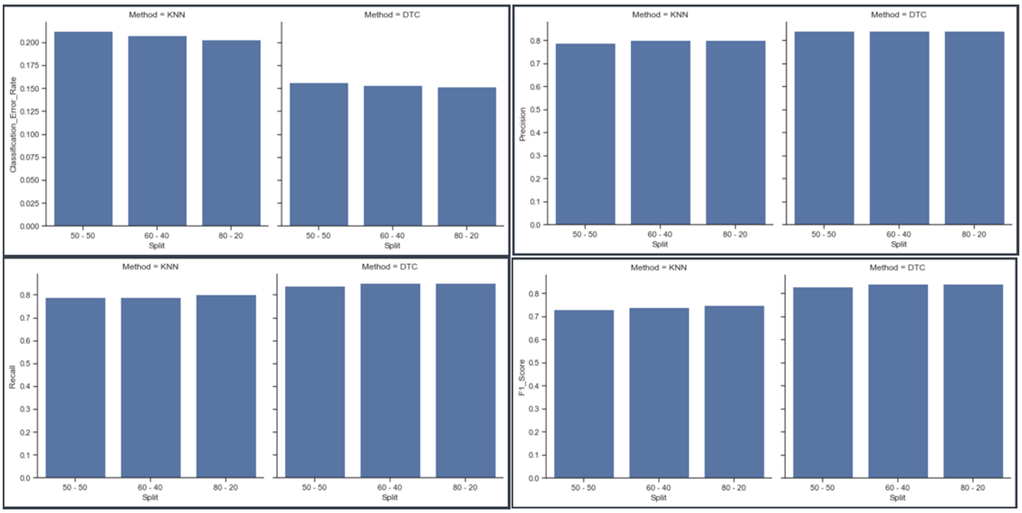

The main purpose of executing two different classification methods and experimenting multiple iterations of each method is to be able to construct a model that has the potential to deliver the 
most accurate prediction results. The multi-plot grid shown in Figure 9, illustrates a comparison between KNN and DTC based on the major accuracy measures of the optimised models that were provided previously. In general terms, each cell of the grid represents an accuracy measure comparison between KNN and DTC. For the classification error rate (plot on the top left corner), changing the method from KNN to DTC significantly enhances the model. Additionally, amongst DTC models, 80 – 20 split shows the best performance as it generates the least number of errors. 

With regards to the precision, expanding the training split seems to have a minor positive impact in KNN method. While, in DTC it fails to impact the precision at all. The recall also appears to be following the same pattern as precision, where it is almost equal for the different splits within each method with DTC displaying slightly better results. Finally, in F1-score, training split expansion marginally enhances the results within a model, whereas migration from KNN to DTC seem to have a significant positive effect. Overall, 80 – 20 split of DTC is recommended as the best model because it delivers the most accurate results: the lowest error rate and the highest precision, recall, and F1-score.


# 6. Conclusion

This report aimed at developing a model that based on the 1994 United States Census Data can predict to which class of income an adult would belong to. Three main operational sets of actions were taken that include data pre-processing, data exploration, and data modelling. During the pre-processing, anomalies and parasites of the data were removed to prepare it for exploration. Afterwards, the data was explored to discover correlations among different variables. Following the exploration, principles of classification were applied to the data in the framework KNN and DTC methods. The DTC model with 80 – 20 train test split was found as the most accurate model. However, as the room for improvement always exists, this body of work could further improve by taking advantage of feature engineering and advanced normalisation techniques.